In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [23]:
# Carregar os dados do arquivo CSV em um DataFrame
data = pd.read_csv("wholesale_customers.csv")

data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [24]:
#Pré-processamento: normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


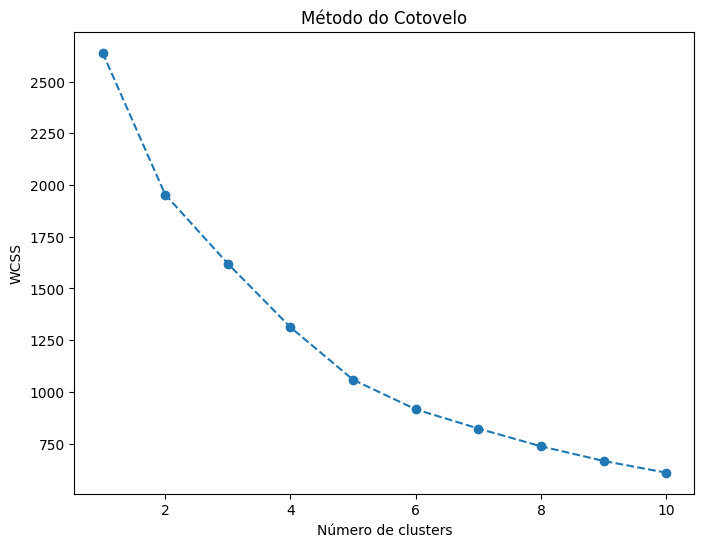

In [25]:
# Encontrar o número ideal de clusters usando o método do cotovelo

wcss = []  # Lista para armazenar a soma dos quadrados das distâncias

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Soma dos quadrados dentro do cluster
plt.show()


In [26]:
k = 4  # Número de clusters escolhido com base no gráfico do cotovelo

# Executar o algoritmo K-Means com o número de clusters escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Adicione as informações do cluster ao DataFrame original
data['Cluster'] = kmeans.labels_


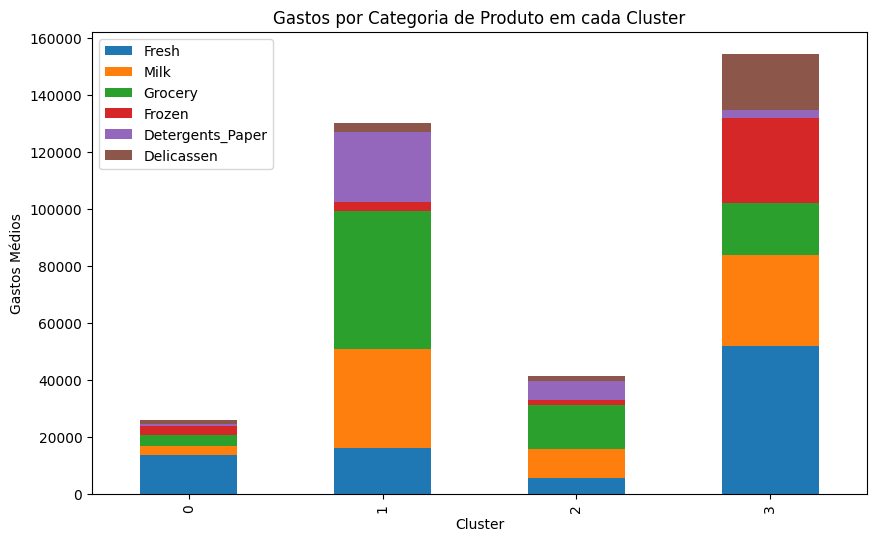

In [27]:
# Criar um gráfico de barras empilhadas dos gastos por categoria de produto em cada cluster
gastos_por_categoria = data.groupby('Cluster').mean()
gastos_por_categoria[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gastos por Categoria de Produto em cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gastos Médios')
plt.show()
